In [204]:
# perusing through
import pandas as pd
import altair as alt
alt.data_transformers.enable('vegafusion')
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
# import pandas_profiling

file_name = "data/avocado.csv"

avocado_df = pd.read_csv(file_name)

avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
avocado_df.columns

In [205]:
#1. Drop columns E,F,G using python

# Drop columns 4046, 4225, and 4770
drop_EFG = ['Unnamed: 0', '4046', '4225', '4770']
avocado_data = avocado_df.drop(columns=drop_EFG)

avocado_data.head()

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
avocado_data.info()

In [ ]:
avocado_data.describe()

In [206]:
melted_data = pd.melt(avocado_data[['AveragePrice']])

In [207]:
# histogram for 'AveragePrice'
alt.Chart(melted_data).mark_bar().encode(
    alt.X('value:Q', bin=alt.Bin(maxbins=30), title='Average Price'),
    alt.Y('count()', title='Count'),
    color=alt.value('steelblue')
).properties(
    width=400,
    height=300,
    title='Distribution of Average Price'
)

alt.Chart(...)

In [ ]:
alt.Chart(avocado_data).mark_bar().encode(
    alt.X('Total Volume:Q', bin=alt.Bin(maxbins=30), title='Total Volume'),
    alt.Y('count()', title='Count'),
    color=alt.value('orange')
).properties(
    width=400,
    height=300,
    title='Distribution of Total Volume'
)

In [ ]:
alt.Chart(avocado_data).mark_bar().encode(
    alt.X('Total Bags:Q', bin=alt.Bin(maxbins=30), title='Total Bags'),
    alt.Y('count()', title='Count'),
    color=alt.value('green')
).properties(
    width=400,
    height=300,
    title='Distribution of Total Bags'
)

<Axes: >

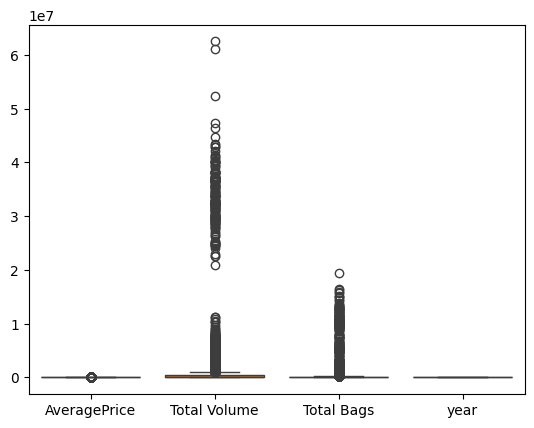

In [208]:
#Do anormalies detection. Find the abnormal columns and the ones with the most abnormalities

# Selecting relevant columns for analysis
features_of_interest = ['AveragePrice', 'Total Volume', 'Total Bags', 'year', ]
clean_data = avocado_data[features_of_interest].copy()

# Visualizing distribution using boxplot
sns.boxplot(data=clean_data)

In [ ]:

# Fitting Isolation Forest model
random_state = np.random.RandomState(42)
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.2), random_state=random_state)
model.fit(clean_data)

# Getting anomaly predictions
clean_data['anomaly_score'] = model.predict(clean_data)

anomalies = clean_data[clean_data['anomaly_score'] == -1]

# Sum
total_them_up = anomalies[features_of_interest].sum()

sort = total_them_up.sort_values(ascending=False)

#  result
print("Columns with the Most Anomalies:")
print(sort)

In [ ]:
# Plot the result
plt.figure(figsize=(10, 6))
sort.plot(kind='bar', color='coral')
plt.title('Columns with the Most Anomalies')
plt.xlabel('Columns')
plt.ylabel('Sum of Anomaly Scores')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Find the year with the least bags
year_least_bags = avocado_data.groupby('year')['Total Bags'].sum().idxmin()

# Find the state with the least bags
state_least_bags = avocado_data.groupby('region')['Total Bags'].sum().idxmin()

# Find the state with the highest bags of avocado
state_highest_bags = avocado_data.groupby('region')['Total Bags'].sum().idxmax()

# Find the state with the highest price of avocado
state_highest_price = avocado_data.groupby('region')['AveragePrice'].mean().idxmax()

# Find the state that consumes the most avocado
state_most_consumption = avocado_data.groupby('region')['Total Volume'].sum().idxmax()

print(f"Year with the least bags: {year_least_bags}")
print(f"State with the least bags: {state_least_bags}")
print(f"State with the highest bags of avocado: {state_highest_bags}")
print(f"State with the highest price of avocado: {state_highest_price}")
print(f"State that consumes the most avocado: {state_most_consumption}")


In [ ]:
# Finding 1: Visualize the distribution of 'AveragePrice' for each state
plt.figure(figsize=(15, 8))
sns.boxplot(x='AveragePrice', y='region', data=avocado_data)
plt.title('Distribution of AveragePrice for Each State')
plt.show()


In [ ]:
# Display the data types of each column in the dataset
data_types = avocado_data.dtypes

# Count the unique data types
num_data_types = data_types.nunique()

# Print the unique data types and the count
print("Number of unique data types:", num_data_types)
print("Unique data types:", data_types.unique())


In [ ]:
for column in features_of_interest:
  clean_data[column+'_anomaly'] = (clean_data['anomaly_score'] == -1)
  # Displaying rows with anomalies
  inlier = clean_data[column + '_anomaly']
  outlier = (clean_data['anomaly_score'] == -1)

  conf_matrix = confusion_matrix(inlier, outlier)
  classification_rep = classification_report(inlier, outlier)
  
  print(f"\nFeature: {column}")
  print("\nClassification Report:\n", classification_rep)
  print("Confusion Matrix:\n", conf_matrix)

In [ ]:
# Visualize anomalies using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AveragePrice', y='Total Volume', data=clean_data, hue=clean_data['anomaly_score'], palette={1: 'blue', -1: 'red'}, s=50)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('AveragePrice')
plt.ylabel('Total Volume')
plt.legend(loc='upper right')
plt.show()

In [209]:
sorted_avocado_data = avocado_data.sort_values("Date")
sorted_avocado_data

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...
8574,2018-03-25,1.36,908202.13,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,2018-03-25,0.70,9010588.32,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,2018-03-25,1.42,163496.70,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,2018-03-25,1.70,190257.38,89631.19,89424.11,207.08,0.00,organic,2018,California


In [ ]:
# Date + AveragePrice plot
alt.Chart(avocado_data).mark_line(point=True).encode(
    x='Date:T',
    y='AveragePrice:Q',
    tooltip=['Date:T', 'AveragePrice:Q']
).properties(
    width=600,  
    height=400,  
    title='Avocado Prices Over Time'  
).configure_axis(
    labelAngle=45  # 
).configure_point(
    size=50  # customizeable
)

In [ ]:
alt.Chart(avocado_data).mark_bar().encode(
    x=alt.X('region:N', title='Region'),  # Encoding 'region' on the x-axis
    y=alt.Y('count():Q', title='Number of Regions'),  # Counting the number of occurrences for each region
    tooltip=['region:N', 'count():Q']  # Adding tooltips for better interactivity
).properties(
    width=600,  # Adjusted width for better proportions
    height=400,  # Adjusted height for better proportions
    title='Number of Regions'  # Added a title
).configure_axis(
    labelAngle=45  # Rotated x-axis labels for better readability
)

In [ ]:
# Altair bar chart
alt.Chart(avocado_df).mark_bar().encode(
    x=alt.X('year:N', title='Year'),  
    y=alt.Y('count():Q', title='Count'), 
    tooltip=['year:N', 'count():Q'] 
).properties(
    width=600,  
    height=400,  
    title='Count of Avocado Data by Year'  
).configure_axis(
    labelAngle=45  
)

In [210]:
prophet_data = sorted_avocado_data[['Date', 'AveragePrice']]
prophet_data

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [211]:
timeseries_data = prophet_data.rename(columns={'Date':'ds', 'AveragePrice':'y'})

timeseries_data

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [ ]:
m = Prophet()
m.fit(timeseries_data)

In [ ]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [ ]:
forecast

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

In [ ]:
figure = m.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Forecasted Price')

In [ ]:
from prophet.diagnostics import performance_metrics, cross_validation

In [ ]:
# evaluate
from prophet.diagnostics import performance_metrics, cross_validation

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print(df_p.head())  # Display key evaluation metrics

ARIMA PREDICTIONS

In [212]:
# Assuming you have the avocado data in a DataFrame named 'avocado_data'
# Make sure the 'Date' column is in datetime format and set it as the index
sorted_avocado_data['Date'] = pd.to_datetime(sorted_avocado_data['Date'])
sorted_avocado_data = sorted_avocado_data.set_index('Date')

# Extracting the average prices for simplicity
price_data = sorted_avocado_data.groupby('Date')['AveragePrice'].mean()

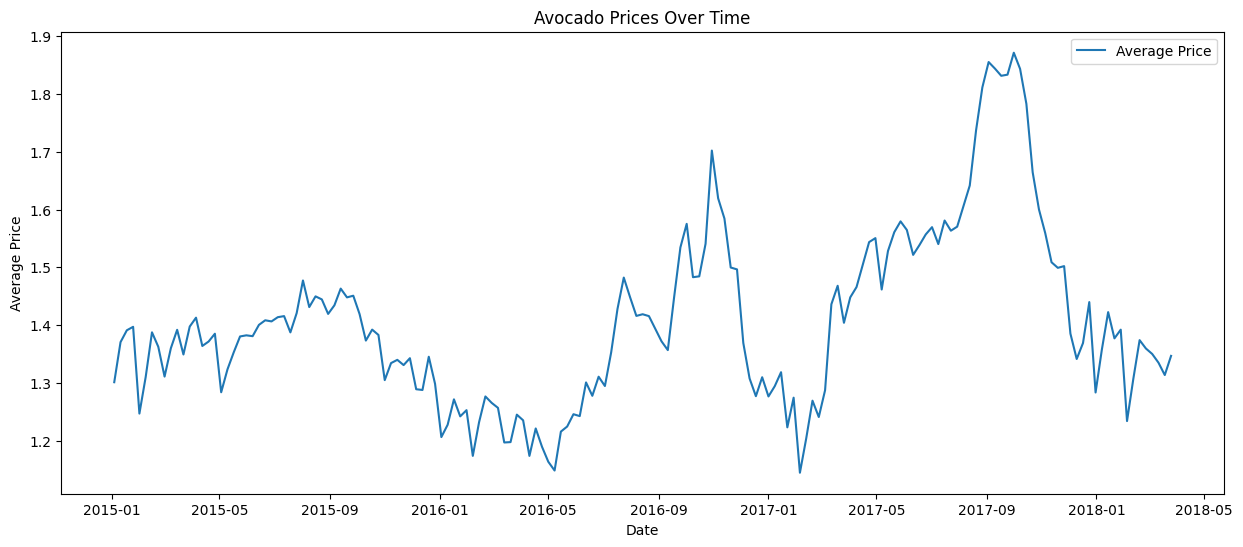

In [213]:
# Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(price_data, label='Average Price')
plt.title('Avocado Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

In [ ]:
# with mean NOT STATIONARY

# result = adfuller(price_data)
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])
# print('Critical Values:', result[4])


In [217]:
# Check for stationarity using Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

result = adfuller(price_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -2.357816524766646
p-value: 0.15399792321893585
Critical Values: {'1%': -3.4698858990744115, '5%': -2.8789026251889647, '10%': -2.5760266680839004}


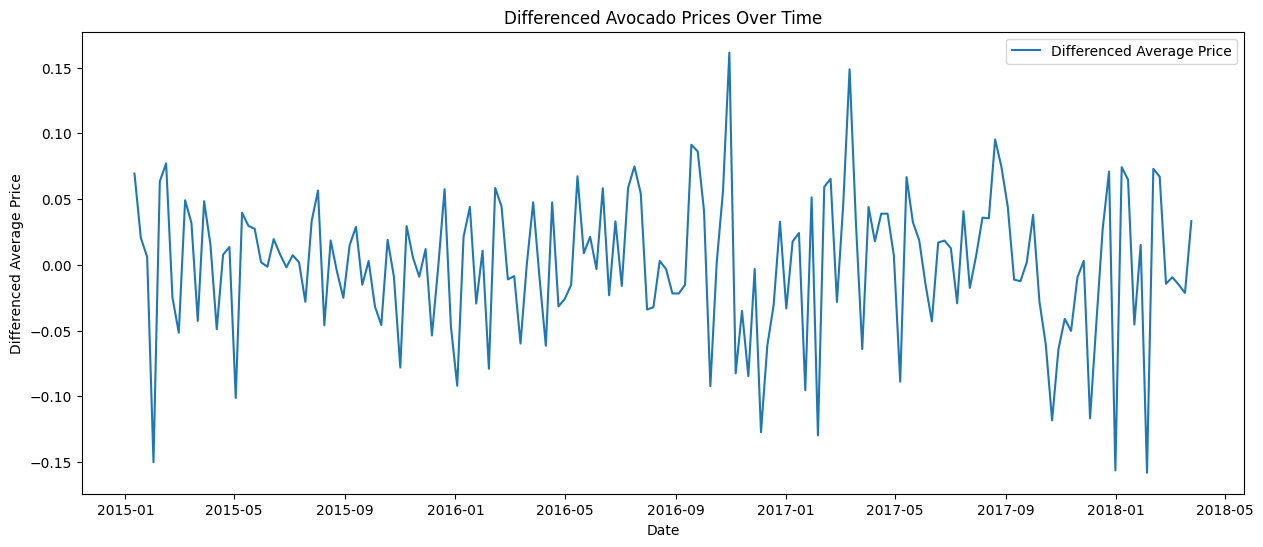


ADF Statistic (Differenced): -13.199464270995628
p-value (Differenced): 1.1020064201645784e-24
Critical Values (Differenced): {'1%': -3.470126426071447, '5%': -2.8790075987120027, '10%': -2.5760826967621644}


In [218]:
# If the p-value is less than 0.05, the series is stationary; otherwise, perform differencing
if result[1] > 0.05:
  # Differencing to make the series stationary
  price_data_diff = price_data.diff().dropna()

  # Plot differenced time series data
  plt.figure(figsize=(15, 6))
  plt.plot(price_data_diff, label='Differenced Average Price')
  plt.title('Differenced Avocado Prices Over Time')
  plt.xlabel('Date')
  plt.ylabel('Differenced Average Price')
  plt.legend()
  plt.show()

  # Perform the Dickey-Fuller test again on differenced data
  result_diff = adfuller(price_data_diff)
  print('\nADF Statistic (Differenced):', result_diff[0])
  print('p-value (Differenced):', result_diff[1])
  print('Critical Values (Differenced):', result_diff[4])


In [219]:
# Split the data into training and testing sets
train_size = int(len(price_data) * 0.8)
train, test = price_data[:train_size], price_data[train_size:]

In [224]:
# Build ARIMA model
order = (1, 1, 1)  # Example order; you may need to tune this
model = ARIMA(train, order=order, freq='W')
fit_model = model.fit()

c:\Users\send2\OneDrive\Documents\data_science_projects\ai_ds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



In [226]:
# Make predictions
predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1)

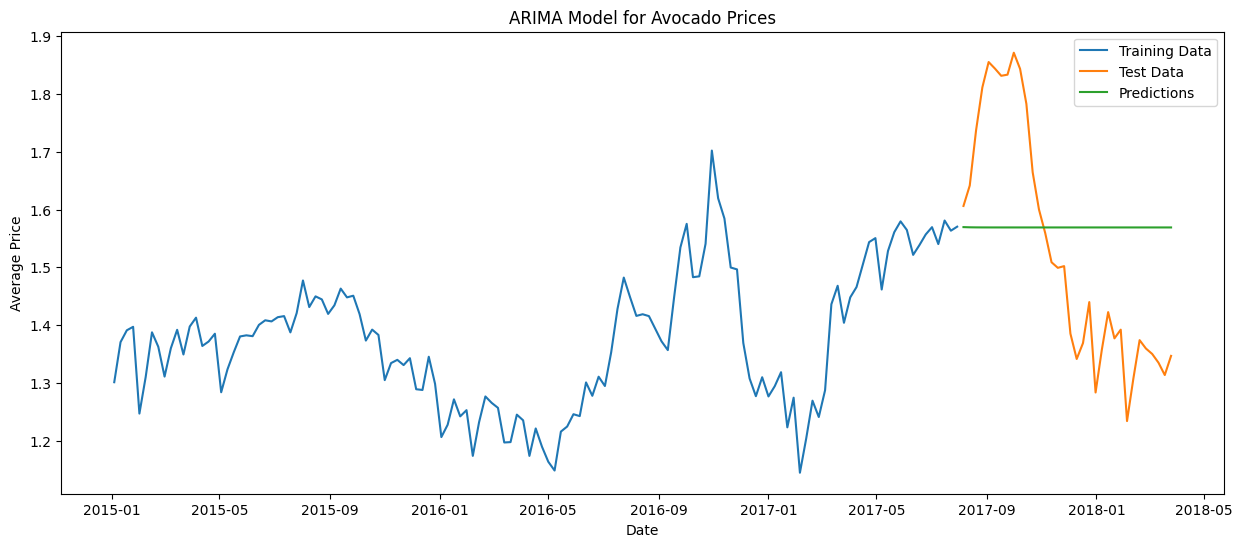

In [227]:
# Plot predictions against actual values
plt.figure(figsize=(15, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(predictions, label='Predictions')
plt.title('ARIMA Model for Avocado Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

In [229]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - predictions) / test)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 0.18865866560259484
Mean Squared Error (MSE): 0.04302087545065351
Root Mean Squared Error (RMSE): 0.20741474260682027
Mean Absolute Percentage Error (MAPE): 12.594580300523248%
